# Proyecto de red neuronal


In [48]:
#Librerías de apoyo
from google.colab import drive
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import random
from numpy import asarray, save, load, random
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import h5py


## Parte Cero creando la bases de datos.

In [10]:
#Este sirve para realizar la base de datos de las imagenes que se tomaron fotos.
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [12]:
#Cambiamos el directorio de trabajo para facilitar el trabajo
os.chdir('/content/MyDrive/MyDrive/Vision/DL17')

In [13]:
!pwd
!ls
!ls -lth
!pwd

/content/MyDrive/MyDrive/Vision/DL17
 Dataset  'Proyecto Final.ipynb'   test
total 747K
-rw------- 1 root root 739K May 31 03:37 'Proyecto Final.ipynb'
drwx------ 2 root root 4.0K May 16 05:33  test
drwx------ 2 root root 4.0K May 16 03:43  Dataset
/content/MyDrive/MyDrive/Vision/DL17


In [14]:
#la librería glob sirve para
#buscar archivos y comodines
#se usa para todas las imagenes y sea más fácil extraer archivos

In [15]:
#esto se hace para extraer todas las imagenes que ienen terminación .jpg
#y esto guarda la dirección
lista_papel = glob.glob('Dataset/papel/*.jpg')
lista_tijera = glob.glob('Dataset/tijera/*.jpg')
lista_piedra = glob.glob('Dataset/piedra/*.jpg')
len(lista_papel)

351

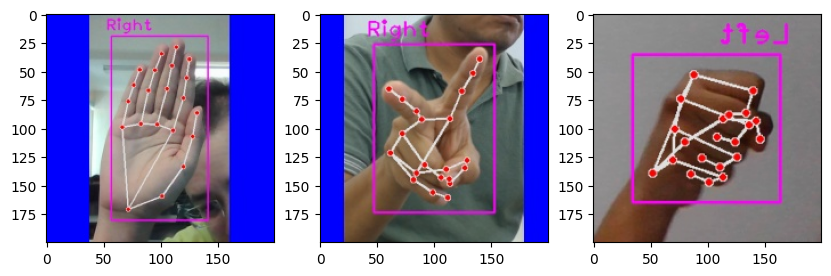

In [17]:
#Mostramos algunas de las imagenes.

def ImgPrint(Frame):
    img = cv.imread(Frame)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap="binary")
    plt.show()

def ListImg(List):
    for i, value in enumerate(List):
        if(i < 5):
            ImgPrint(value)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
img = cv.imread(lista_papel[random.randint(0, len(lista_papel) - 1)])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap="binary")

plt.subplot(1, 3, 2)
img = cv.imread(lista_tijera[random.randint(0, len(lista_tijera) - 1)])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap="binary")

plt.subplot(1, 3, 3)
img = cv.imread(lista_piedra[random.randint(0, len(lista_piedra) - 1)])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap="binary")

plt.show()


In [18]:
#Identificamos la cantidad del dataset
print(len(lista_tijera))
print(len(lista_papel))
print(len(lista_piedra))

356
351
455


In [19]:
#se define este diccionario que contiene la direccion de la lista de imagenes.
data_dict={'papel_imagenes' :   lista_papel ,
           'tijera_imagenes'  : lista_tijera,
           'piedra_imagenes' : lista_piedra}

In [20]:
#diccionario de etiquetas de las imagenes
labels_dict={'papel_imagenes' :   0 ,
           'tijera_imagenes'  : 1,
           'piedra_imagenes' : 2}

In [31]:
#revisar
labels_dict.items()
print()
#data_dict.items()

In [23]:
#Rescalamos la lista de imagenes en un tamaño de 64x64 y guardamos en un nuestros datos de x y en la listas.
X = []
y = []

for label , lista_images   in data_dict.items():
  print(label)
  for image in lista_images:
    img = cv.imread( image  )
    img_resize = cv.resize( img, (64,64) )
    X.append(img_resize)
    y.append( labels_dict[label] )

papel_imagenes
tijera_imagenes
piedra_imagenes


In [24]:
#con las imagenes de la librería de mediapipe
X = np.array(X)
y = np.array(y)


In [25]:
# No.Imagenes. No.Filas, No.Columnas, No.Canales
X.shape

(1162, 64, 64, 3)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
#escalamos los valores de los pixeles
X_train_scaled  = X_train / 255
X_test_scaled  = X_test / 255

In [28]:
# one hot encode outputs
#convertimos en vector
y_train =  to_categorical( y_train )
y_test =  to_categorical( y_test )
print(y_test.shape)
print(y_train.shape)
print(y_test)
print(y_train)

(291, 3)
(871, 3)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.

In [32]:
#esto lo va a guardar en carpeta dataset
np.save('Dataset/X_hand.npy', X)
np.save('Dataset/y_hand.npy', y)


In [33]:
!ls
!ls Dataset

 Dataset  'Proyecto Final.ipynb'   test
modelo_CNN_Aug.h5  modelo.h5  papel  piedra  tijera  X_hand.npy  y_hand.npy


## Parte Uno. Creación del modelo

In [35]:
#como ya están guardados se llaman los numeros como las etiquetas
# Cargar los datos
X = np.load('Dataset/X_hand.npy')
y = np.load('Dataset/y_hand.npy')
print(X.shape) #
print(y.shape)

(1162, 64, 64, 3)
(1162,)


In [36]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(871, 64, 64, 3)
(871,)
(291, 64, 64, 3)
(291,)


In [38]:
#se dividen las imagnees entre 255 para binarizar los valores Normalizando los valores
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
# one hot encode outputs
#las etiquetas  y datos se convierten en vectores
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Modelo

1. Conv 16 (3,3) , relu
2. MP (2,2)
3. Conv 32 (3,3), relu
4. MP (2,2)
5. Conv 64 (3,3), relu
6. MP (2,2)
7. Droput
8. Flatten
9. 128 , relu
10. 64, relu
11. 16, relu
12. num_classes, softmax


In [49]:
#Modelo propuest para poder clasificar las imagenes teniendo a la salida 3 neuornas en el cual se obtien un vector de probabilidad y se normaliza la salida para determinar el resultado con mayor probabilidad
def modelo_CNN():
  model = Sequential()
  #conv 16 (3,3) , relu se define de manera secuencial
  #filtros
  model.add(Conv2D( 16, (3,3), input_shape=(64,64,3), activation='relu' ))
  #maxpooling
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D( 32, (3,3), activation='relu' ))
  #maxpooling
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D( 64, (3,3), activation='relu' ))
  #maxpooling
  model.add(MaxPooling2D(2,2))

  #Dropuot
  model.add(Dropout(0.2))
  #Aplanamiento los arreglos en un vector
  model.add(Flatten())
  #se agregan neuronas sencillas --------------
  model.add(Dense (128, activation='relu'))
  model.add(Dense (64, activation='relu'))
  model.add(Dense (16, activation='relu'))
  #se agrega la última capa y se definen las 3 clases
  model.add(Dense (3, activation='softmax'))

  model.compile(loss='categorical_crossentropy' , optimizer='adam',metrics = ['accuracy'])
  return  model

In [50]:
#Modelo de pruebas
#def modelo_CNN():
#  model = Sequential()
  #conv 16 (3,3) , relu se define de manera secuencial
  #filtros
#  model.add(Conv2D( 16, (3,3), input_shape=(64,64,3), activation='relu' ))
  #maxpooling
#  model.add(MaxPooling2D(2,2))

#  model.add(Flatten())
  #se agregan neuronas sencillas --------------
#  model.add(Dense (128, activation='relu'))
  #se agrega la última capa y se definen las 3 clases
#  model.add(Dense (3, activation='softmax'))

#  model.compile(loss='categorical_crossentropy' , optimizer='adam',metrics = ['accuracy'])
#  return  model

In [51]:

# Convertir las etiquetas a codificación categórica
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

model=modelo_CNN()

# Entrenar el modelo utilizando las etiquetas codificadas categóricamente
history_CNN = model.fit(X_train_scaled, y_train_categorical, validation_data=(X_test_scaled, y_test_categorical),
                         epochs=10, batch_size=10, verbose=2)

Epoch 1/10
88/88 - 5s - loss: 0.9524 - accuracy: 0.5224 - val_loss: 0.8542 - val_accuracy: 0.6426 - 5s/epoch - 55ms/step
Epoch 2/10
88/88 - 5s - loss: 0.7158 - accuracy: 0.6980 - val_loss: 0.5984 - val_accuracy: 0.7251 - 5s/epoch - 52ms/step
Epoch 3/10
88/88 - 3s - loss: 0.5458 - accuracy: 0.7887 - val_loss: 0.4652 - val_accuracy: 0.8557 - 3s/epoch - 37ms/step
Epoch 4/10
88/88 - 3s - loss: 0.3404 - accuracy: 0.8703 - val_loss: 0.3216 - val_accuracy: 0.8935 - 3s/epoch - 32ms/step
Epoch 5/10
88/88 - 3s - loss: 0.2204 - accuracy: 0.9254 - val_loss: 0.3090 - val_accuracy: 0.8866 - 3s/epoch - 32ms/step
Epoch 6/10
88/88 - 3s - loss: 0.1847 - accuracy: 0.9277 - val_loss: 0.2352 - val_accuracy: 0.9244 - 3s/epoch - 39ms/step
Epoch 7/10
88/88 - 4s - loss: 0.1697 - accuracy: 0.9403 - val_loss: 0.2023 - val_accuracy: 0.9244 - 4s/epoch - 51ms/step
Epoch 8/10
88/88 - 3s - loss: 0.1091 - accuracy: 0.9656 - val_loss: 0.2251 - val_accuracy: 0.9175 - 3s/epoch - 32ms/step
Epoch 9/10
88/88 - 3s - loss: 0.

In [52]:
# Final evaluation of the model
scores = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)

print('Error del modelo base: %.2f%%' % (100 - scores[1] * 100))


Error del modelo base: 7.22%


(0.0, 2.0)

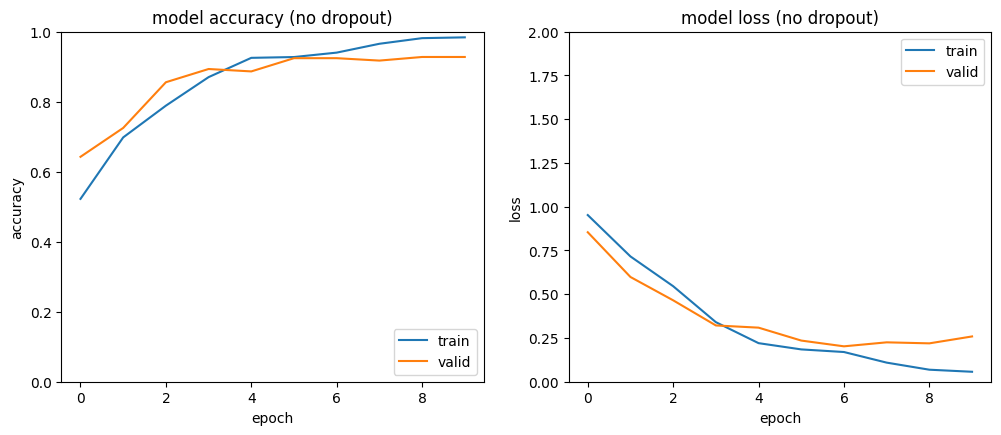

In [53]:


plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (no dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])
#el modelo no está aprendiendo a generalizar modelos, llegaa un punto en el que dice que todoslos datos que obtiene son correctos
#sin embargo, se utiliza el valid para validar que sea cierto con un dato de entrenamiento para tener un score sobre los datos que está entrenando y sobre la clasificación sea correcta

In [54]:
direction="/content/MyDrive/MyDrive/Vision/DL17/Dataset"
model.save(direction+'/modelo.h5')
!ls Dataset

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


modelo_CNN_Aug.h5  modelo.h5  papel  piedra  tijera  X_hand.npy  y_hand.npy


## Parte Dos

In [72]:
#Se cargan el dataset
X = np.load('Dataset/X_hand.npy')
y = np.load('Dataset/y_hand.npy')

In [73]:
#Se dividen en datos de entrenamiento, de muestra y los targets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
#Se normalizan las imagenes ya que las imagenes son de 8bits lo que quiere decir que los valores de cada pixel
#van de 0 a 255, por lo que se normalizan los valores para tener un rango de valor de 0-1 y poder aplicarlo a nuestro modelo de binarización de probabilidades.
X_train_scaled  = X_train / 255
X_test_scaled  = X_test / 255

In [75]:
# one hot encode outputs
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )

In [76]:
#aqui se hacen los ajustes de la imagenes se procesan dandoles flips, rotation entre otras.
#se rotan se hace el desfase width_shift, el estiramiento y se realiza de manera aletoria.

from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30,  width_shift_range=0.2,
                         height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

#links de los documentacion

#https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
#https://faroit.com/keras-docs/1.2.2/preprocessing/image/
#https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

In [77]:
##Llamamos al modelo anteriormente creado en la parte 1

In [78]:
model = modelo_CNN()


In [79]:
#aumento de datos con la función aug
history_CNN_Aug = model.fit( aug.flow(  X_train_scaled, y_train,  batch_size = 10)  ,
                            validation_data=(X_test_scaled, y_test), steps_per_epoch = len(X_train_scaled) // 10,
                            epochs=20, verbose=1)


Epoch 1/20
87/87 [==============================] - 10s 71ms/step - loss: 1.0966 - accuracy: 0.3496 - val_loss: 1.0719 - val_accuracy: 0.4983
Epoch 2/20
87/87 [==============================] - 4s 46ms/step - loss: 1.0462 - accuracy: 0.4739 - val_loss: 1.0603 - val_accuracy: 0.4433
Epoch 3/20
87/87 [==============================] - 7s 78ms/step - loss: 0.9765 - accuracy: 0.5273 - val_loss: 0.8919 - val_accuracy: 0.5567
Epoch 4/20
87/87 [==============================] - 4s 45ms/step - loss: 0.9331 - accuracy: 0.5482 - val_loss: 0.8381 - val_accuracy: 0.5636
Epoch 5/20
87/87 [==============================] - 6s 69ms/step - loss: 0.9316 - accuracy: 0.5366 - val_loss: 0.9629 - val_accuracy: 0.5120
Epoch 6/20
87/87 [==============================] - 5s 52ms/step - loss: 0.8834 - accuracy: 0.5807 - val_loss: 0.9219 - val_accuracy: 0.5739
Epoch 7/20
87/87 [==============================] - 6s 66ms/step - loss: 0.8662 - accuracy: 0.5714 - val_loss: 0.8251 - val_accuracy: 0.5876
Epoch 8/20
8

In [82]:
# Final evaluation of the model
scores=model.evaluate(X_test_scaled,y_test,verbose=0)

print('Error del modelo base : %.2f%%' % (100-scores[1]*100))

Error del modelo base : 35.05%


(0.0, 2.0)

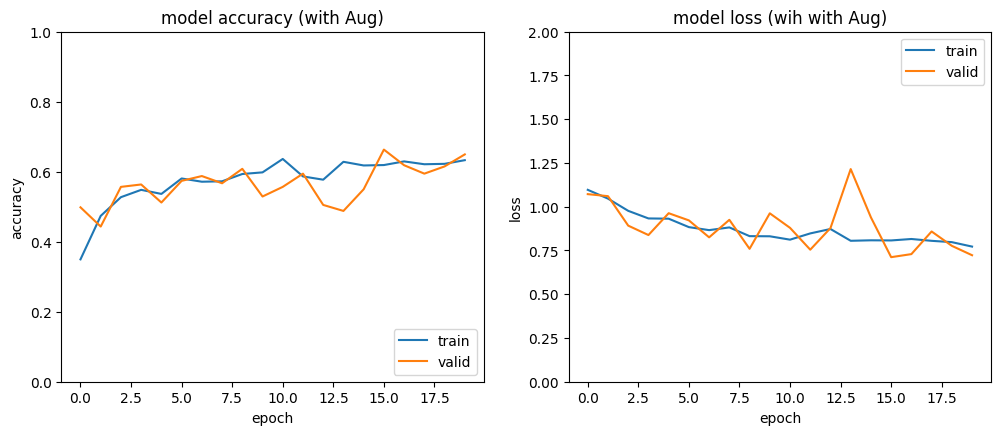

In [83]:


plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history_CNN_Aug.history['accuracy'])
plt.plot(history_CNN_Aug.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (with Aug)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history_CNN_Aug.history['loss'])
plt.plot(history_CNN_Aug.history['val_loss'])
plt.title('model loss (wih with Aug)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])

In [ ]:
direction="/content/MyDrive/MyDrive/Vision/DL17/Dataset"
model.save(direction+'/modelo_CNN_Aug.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Parte 3

In [85]:

direction="/content/MyDrive/MyDrive/Vision/DL17/Dataset"
model = load_model(direction+'/modelo_CNN_Aug.h5')
scores=model.evaluate(X_test_scaled,y_test,verbose=0)

print('Error del modelo base : %.2f%%' % (100-scores[1]*100))

Error del modelo base : 6.87%


In [86]:
img_papel='test/papel2.jpg'
img_tijera='test/tijera2.jpg'
img_piedra='test/piedra2.jpg'

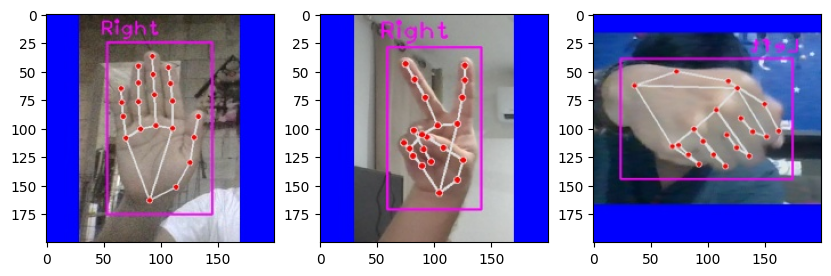

In [87]:
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
img = cv.imread(img_papel)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB) , cmap="binary")

plt.subplot(1, 3, 2)
img = cv.imread(img_tijera)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB) , cmap="binary")

plt.subplot(1, 3, 3)
img = cv.imread(img_piedra)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB) , cmap="binary")


plt.show()

In [88]:
#Papel
image=img_papel
test_image = cv.imread(image)
test_image = cv.resize(test_image, (64, 64))
test_image = test_image / 255
test_image = img_to_array(test_image)  # this is a Numpy array with shape (180, 180, 3)
test_image = test_image.reshape((1,) + test_image.shape)  # this is a Numpy array with shape ((1, 180, 180, 3))
test_image.shape

(1, 64, 64, 3)

In [89]:
# labels_dict={'papel_imagenes' :   0 ,
#           'tijera_imagenes'  : 1,
#           'piedra_imagenes' : 2}

labels_dict_inv= {0:'papel',
           1:'tijera',
           2:'piedra'}

In [90]:
prediccion_papel=model.predict(test_image)

1/1 [==============================] - 0s 131ms/step


In [91]:
prediccion_papel

array([[0.9386585 , 0.00839199, 0.05294948]], dtype=float32)

In [92]:
labels_dict_inv[ np.argmax(prediccion_papel) ]

'papel'

In [93]:
#tijera
image=img_tijera
test_image = cv.imread(image)
test_image = cv.resize(test_image, (64, 64))
test_image = test_image / 255
test_image = img_to_array(test_image)  # this is a Numpy array with shape (180, 180, 3)
test_image = test_image.reshape((1,) + test_image.shape)  # this is a Numpy array with shape ((1, 180, 180, 3))
test_image.shape

(1, 64, 64, 3)

In [94]:
prediccion_tijera=model.predict(test_image)

1/1 [==============================] - 0s 23ms/step


In [95]:
prediccion_tijera

array([[2.6426608e-06, 9.9999237e-01, 5.0471454e-06]], dtype=float32)

In [96]:
labels_dict_inv[ np.argmax(prediccion_tijera) ]

'tijera'

In [97]:
#piedra
image=img_piedra
test_image = cv.imread(image)
test_image = cv.resize(test_image, (64, 64))
test_image = test_image / 255
test_image = img_to_array(test_image)  # this is a Numpy array with shape (180, 180, 3)
test_image = test_image.reshape((1,) + test_image.shape)  # this is a Numpy array with shape ((1, 180, 180, 3))
test_image.shape

(1, 64, 64, 3)

In [98]:
prediccion_piedra=model.predict(test_image)
prediccion_piedra

1/1 [==============================] - 0s 22ms/step


array([[0.00335331, 0.25494277, 0.74170387]], dtype=float32)

In [99]:
labels_dict_inv[ np.argmax(prediccion_piedra) ]

'piedra'